# Praktikum 1 : K-Means Clustering Real-World Example

## 1. Data Loading

In [ ]:
import pandas as pd

df_mall = pd.read_csv(("Mall_Customers (1).csv"), index_col = "CustomerID")
df_mall.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


## 2. Visualization

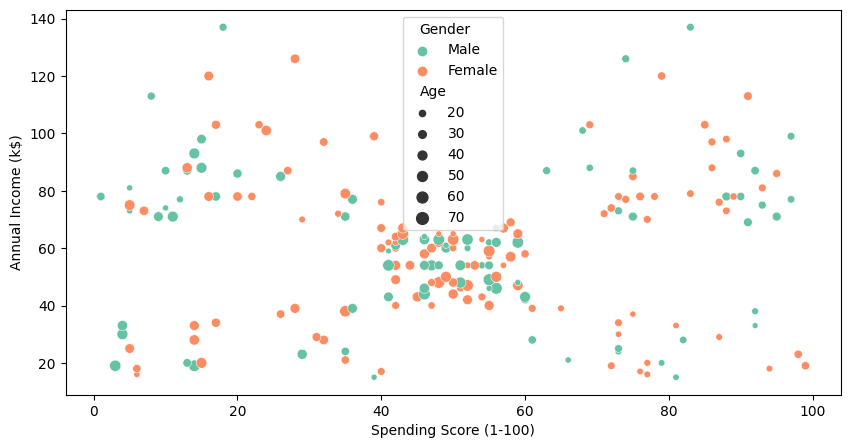

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (10, 5))
sns.scatterplot(
    data=df_mall,
    x="Spending Score (1-100)",
    y="Annual Income (k$)",
    hue="Gender",
    size="Age",
    palette="Set2"
);

Plot diatas merupakan plot data sebaran awal sebelum dilakukan clustering. Warna hijau mewakili gender 'Male' dan warna orange mewakili gender 'Female'

## 3. Normalizing

In [ ]:
from sklearn import preprocessing

X = df_mall.drop(["Gender", "Age"], axis = 1)
X_norm = preprocessing.normalize(X)

## 4. Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

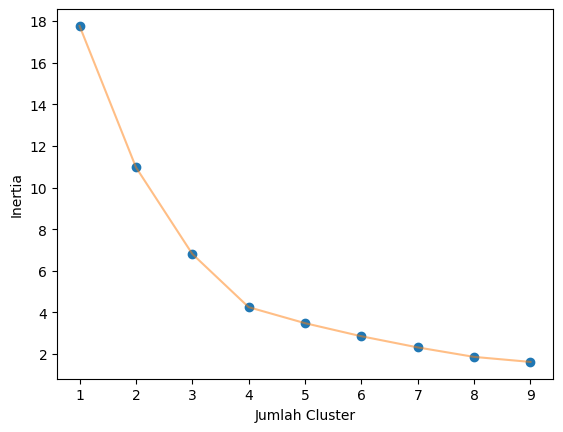

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1, clusters), inertia, "o")
    plt.plot(np.arange(1, clusters), inertia, "-", alpha=0.5)
    plt.xlabel('Jumlah Cluster'), plt.ylabel('Inertia')
    plt.show()

# Contoh penggunaan
data = np.random.rand(100, 2)
elbow_plot(data, clusters=10)

## 5. K-Means Clustering

In [ ]:
algorithm = KMeans(n_clusters = 3, init = "k-means++", random_state = 125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


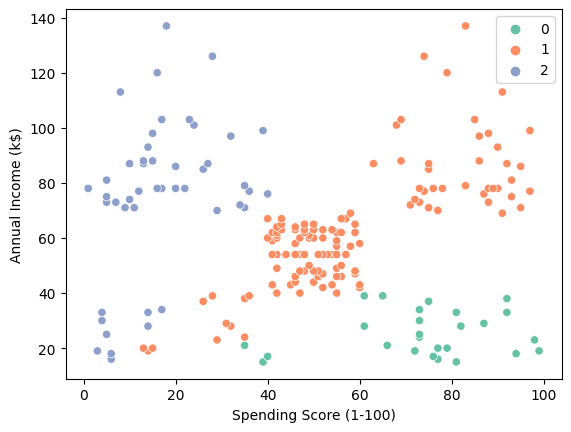

In [ ]:
sns.scatterplot(
    data=X,
    x="Spending Score (1-100)",
    y="Annual Income (k$)",
    hue=labels,
    palette="Set2"
);

Setelah dilakukan clustering terlihat bahwa data yang awalnya tersebar secara acak menjadi lebih berkelompok sesuai dengan warna yang ditentukan.

## 6. Using different features

In [ ]:
X = df_mall.drop(["Gender", "Annual Income (k$)"], axis=1)
X_norm = preprocessing.normalize(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

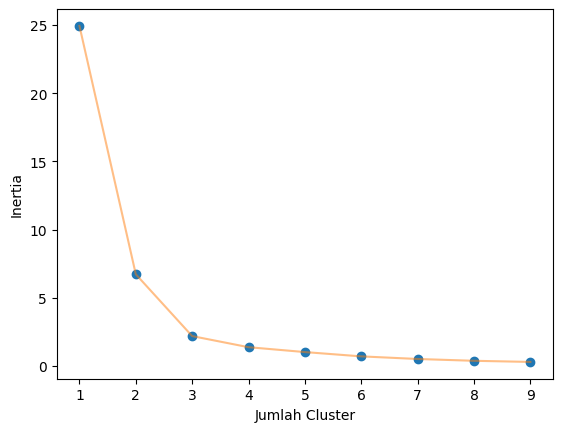

In [ ]:
elbow_plot(X_norm, 10)

In [ ]:
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


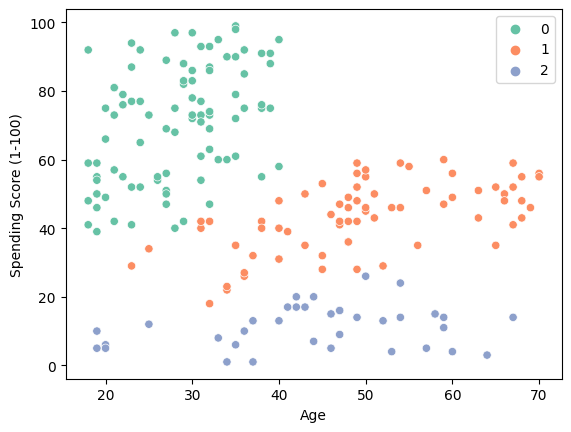

In [ ]:
sns.scatterplot(
    data=X,
    x="Age",
    y="Spending Score (1-100)",
    hue=labels,
    palette="Set2"
);

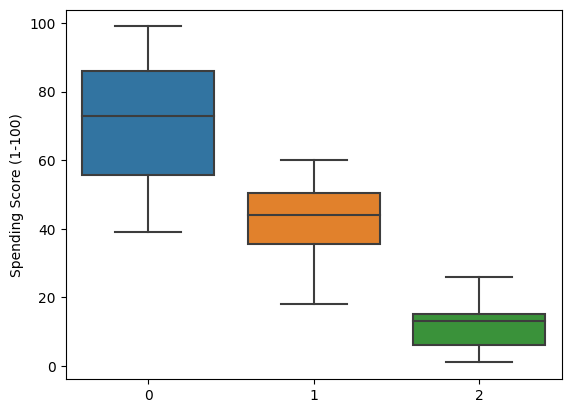

In [ ]:
sns.boxplot(x = labels, y = X['Spending Score (1-100)']);

# Praktikum 2 : K-Means pada Data 3D

## Buat kumpulan data sintetis dari sklearn

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5, -5, 5), (5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3,random_state=1)

## Plot data

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x = X[:,0], y=X[:,1], z=X[:,2])
fig.show()

## Mencari nilai k optimal dengan metode elbow

In [ ]:
wcss = []
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## Plot elbow untuk mencari nilai K optimal

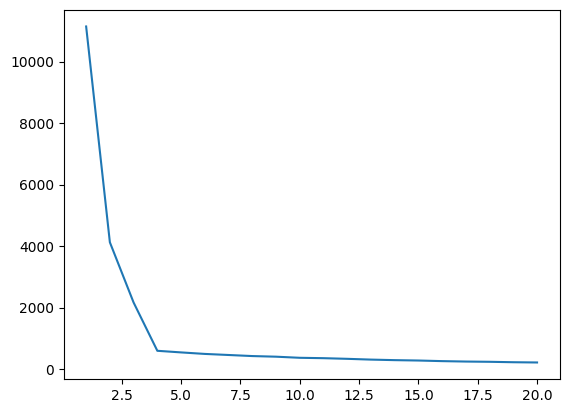

In [ ]:
plt.plot(range(1,21),wcss)

## Fit algoritma K-Means dengan nilai K optimal

In [ ]:
km = KMeans(n_clusters = 4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Analisis berbagai cluster yang terbentuk

In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()